# 1次元の混合正規分布に対してのEMアルゴリズムを実装・描画
- https://cartman0.hatenablog.com/entry/2019/07/01/EM%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E3%81%A7%E6%B7%B7%E5%90%88%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83%28MoG%29%E3%81%AE%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%82%92%E5%B0%8E
-  https://qiita.com/ta-ka/items/3e8b127620ac92a32864

In [1]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import warnings
import japanize_matplotlib

%matplotlib inline
warnings.simplefilter('ignore')

/Users/masanoritakahashi/anaconda3/lib/python3.7/site-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
# E-step
def EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec):
    '''
    data_x[i]
    lambda[k]
    mu[k]
    sigma[k]
    '''
    I = len(data_x)
    # 中身を初期化せずに配列を作成する関数である。
    # 2行, 1000列の配列を生成
    responsibility = sp.empty((k_size, I))
    
    for k in sp.arange(k_size):
        norm = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        #responsibility[k] =  norm.pdf(data_x)
        responsibility[k] = lambda_vec[k] * norm.pdf(data_x)

    responsibility = responsibility / sp.sum(responsibility, axis=0)
    return responsibility

def MStep(k_size, responsibility, data_x):

    lambda_vec = sp.empty(k_size)
    mu_vec = sp.empty(k_size)
    sigma2_vec = sp.empty(k_size)

    for k in sp.arange(k_size):
        r_k = responsibility[k]
        #lambda_vec[k] = sp.sum(r_k) / sp.sum(responsibility)
        lambda_vec[k] = sp.sum(r_k) / responsibility.shape[1]
        #mu_vec[k] = sp.sum(r_k * data_x) / sp.sum(r_k)
        mu_vec[k] = sp.sum(r_k * data_x) / sp.sum(r_k)
        sigma2_vec[k] = sp.sum(r_k * (data_x - mu_vec[k])**2) / sp.sum(r_k)

    return lambda_vec, mu_vec, sigma2_vec

In [3]:
def calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec):
    pdf = sp.zeros_like(x)

    for k in sp.arange(k_size):
        norm_k = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        
        # pdf (Probability density function) 確率密度関数
        # xのときの値を取得
        pdf += lambda_vec[k] * norm_k.pdf(x)
    return pdf

# データの生成  
- f1：平均20, 分散30, データ数15      
- f2：平均90, 分散100, データ数125    
- f1とf2の割合は15:135  
  
- Covid-19初期感染と似ているデータを想定

In [4]:
# 乱数seedの固定
np.random.seed(seed=123)

# 平均20, 分散30
N1 = stats.norm(loc=20, scale=sp.sqrt(30))
# 平均90, 分散120
N2 = stats.norm(loc=90, scale=sp.sqrt(120))

# rvs (Random variates) 確率変数
s1 = N1.rvs(size=15)
s2 = N2.rvs(size=135)

# データの連結
data_x = sp.hstack((s1, s2))
data_x

array([ 14.05375629,  25.46268599,  21.54993707,  11.74968407,
        16.8308759 ,  29.04529044,   6.70853039,  17.65074878,
        26.93381845,  15.2526673 ,  16.28158741,  19.48125761,
        28.1686774 ,  16.50058964,  17.56821066,  85.24192017,
       114.16475333, 113.95504139, 100.99885938,  94.23046004,
        98.07746804, 106.33015118,  79.7484536 , 102.88056183,
        76.26442548,  83.01378232,  99.93683956,  74.34958706,
        88.46562405,  80.55994809,  87.19983009,  59.34299236,
        70.59382715,  82.33322902, 100.1598419 ,  88.09791639,
        90.03117545,  97.53910207,  80.3651621 ,  93.10698166,
        81.17765182,  71.07432892,  85.7179073 ,  96.28572829,
        93.70905722,  89.87040343, 116.20704844,  94.52322609,
       100.72151577, 114.51763187,  75.82400554,  78.6206453 ,
       109.10141039,  81.25766075,  90.3251635 , 101.71376955,
        99.75719965, 109.22381495, 106.38396064, 101.71460976,
        81.53540014,  98.70728427,  93.44267721,  75.47

(array([0.00178964, 0.00357928, 0.01073783, 0.00357928, 0.        ,
        0.00715855, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00178964,
        0.        , 0.00715855, 0.00715855, 0.01610674, 0.02326529,
        0.01968601, 0.03221348, 0.02326529, 0.03042384, 0.02147565,
        0.02326529, 0.0143171 , 0.00894819, 0.00894819, 0.00357928]),
 array([  6.70853039,  10.43367915,  14.15882792,  17.88397669,
         21.60912546,  25.33427423,  29.059423  ,  32.78457177,
         36.50972053,  40.2348693 ,  43.96001807,  47.68516684,
         51.41031561,  55.13546438,  58.86061315,  62.58576192,
         66.31091068,  70.03605945,  73.76120822,  77.48635699,
         81.21150576,  84.93665453,  88.6618033 ,  92.38695206,
         96.11210083,  99.8372496 , 103.56239837, 107.28754714,
        111.01269591, 114.73784468, 118.46299344]),
 <a list of 30 Patch objects>)

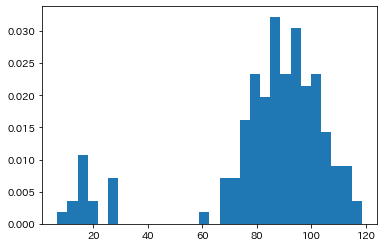

In [5]:
plt.hist(data_x, bins=30, density=True)

## 初期値の設定  
- データをランダムに2分割  
- それぞれの平均値を初期値に用いる
- 分散は全体の標本分散を用いる  
  
## 参考
- 入門　パターン認識と機械学習(https://www.coronasha.co.jp/np/isbn/9784339024791/)


In [6]:
# データをランダムに2分割
random_x = np.split(data_x, 2)
random_x1 = random_x[0]
random_x2 = random_x[1]

In [7]:
mu1_first = np.mean(random_x1)
sigma1_first = np.sum((random_x1 - np.mean(data_x))**2)/random_x1.shape[0]
#sigma1_first = np.var(random_x1)
print("mu1の初期値", mu1_first)
print("sigma1の初期値", sigma1_first)

mu2_first = np.mean(random_x2)
sigma2_first = np.sum((random_x2 - np.mean(data_x))**2)/random_x2.shape[0]
#sigma2_first = np.var(random_x2)
print("mu2の初期値", mu2_first)
print("sigma2の初期値", sigma2_first)

mu1の初期値 76.69284766280447
sigma1の初期値 1022.1256507104317
mu2の初期値 90.79684441086874
sigma2の初期値 173.86155205919823


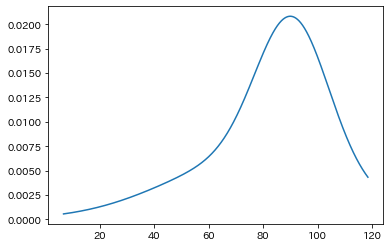

In [8]:
# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[0.5, 0.5]

# 平均(mu)の初期値
mu_vec=[mu1_first, mu2_first]
# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

# データ(-6から6までを200こ)
x = sp.linspace(np.min(random_x), np.max(random_x), 10000)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label="ini")


i: 0 lambda [0.4122 0.5878] mu [72.5622 91.5862] sigma2 [1074.0125  115.0353]
i: 10 lambda [0.1148 0.8852] mu [25.615  91.2848] sigma2 [352.6828 134.6659]
i: 20 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]
i: 30 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]
i: 40 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]
i: 50 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]
i: 60 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]
i: 70 lambda [0.1 0.9] mu [18.8825 90.9517] sigma2 [ 37.3718 140.889 ]


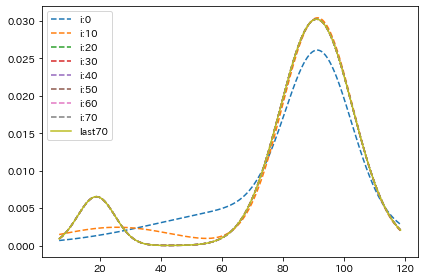

In [9]:
# 70回繰り返す
for i in sp.arange(70+1):
    # Estep
    # responsibilityの更新 
    responsibility = EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec)
    
    # Mstep
    # 混合割合, 平均, 分散の更新
    lambda_vec, mu_vec, sigma2_vec = MStep(k_size, responsibility, data_x)
    
    if i % 10 == 0:
        print("i:", i, "lambda", lambda_vec.round(4), "mu", mu_vec.round(4), "sigma2", sigma2_vec.round(4))
        plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"i:{i}", linestyle="--")
        
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
k_size

2

In [11]:
print("f1の混合比率", lambda_vec[0])
print("mu1", mu_vec[0])
print("sigma1", sigma2_vec[0])

f1の混合比率 0.09999971368035912
mu1 18.882527580815932
sigma1 37.37176505617904


In [12]:
print("f2の混合比率", lambda_vec[1])
print("mu2", mu_vec[1])
print("sigma2", sigma2_vec[1])

f2の混合比率 0.9000002863196408
mu2 90.95174738213542
sigma2 140.88896122255008


# 真の値

- f1：平均20, 分散30, データ数15
- f2：平均90, 分散100, データ数125

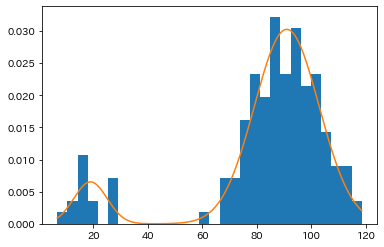

In [13]:
# 推定された分布の可視化
plt.hist(data_x, bins=30, density=True)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")

(array([0.00178964, 0.00357928, 0.01073783, 0.00357928, 0.        ,
        0.00715855, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00178964,
        0.        , 0.00715855, 0.00715855, 0.01610674, 0.02326529,
        0.01968601, 0.03221348, 0.02326529, 0.03042384, 0.02147565,
        0.02326529, 0.0143171 , 0.00894819, 0.00894819, 0.00357928]),
 array([  6.70853039,  10.43367915,  14.15882792,  17.88397669,
         21.60912546,  25.33427423,  29.059423  ,  32.78457177,
         36.50972053,  40.2348693 ,  43.96001807,  47.68516684,
         51.41031561,  55.13546438,  58.86061315,  62.58576192,
         66.31091068,  70.03605945,  73.76120822,  77.48635699,
         81.21150576,  84.93665453,  88.6618033 ,  92.38695206,
         96.11210083,  99.8372496 , 103.56239837, 107.28754714,
        111.01269591, 114.73784468, 118.46299344]),
 <a list of 30 Patch objects>)

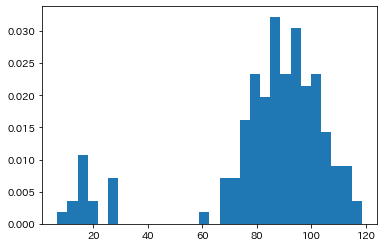

In [14]:
new_N1 = stats.norm(loc=mu_vec[0], scale=sp.sqrt(sigma2_vec[0]))
new_N2 = stats.norm(loc=mu_vec[1], scale=sp.sqrt(sigma2_vec[1]))

# rvs (Random variates) 確率変数
new_s1 = new_N1.rvs(size=int(lambda_vec[0]*150))
new_s2 = new_N2.rvs(size=int(lambda_vec[1]*150))


plt.hist(data_x, bins=30, density=True)

(array([ 1.,  2., 10., 19., 33., 38., 19.,  9.,  3.,  1.]),
 array([ 52.60020493,  59.94714864,  67.29409235,  74.64103606,
         81.98797977,  89.33492348,  96.68186719, 104.0288109 ,
        111.37575461, 118.72269832, 126.06964203]),
 <a list of 10 Patch objects>)

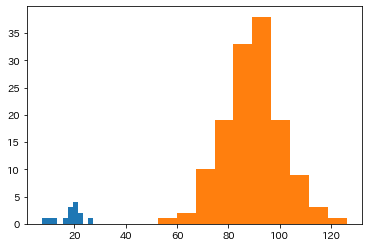

In [15]:
plt.hist(new_s1)
plt.hist(new_s2)

# ✅実データでシミュレーション

In [16]:
import pandas as pd

# 乱数seedの固定
np.random.seed(seed=123)

df = pd.read_excel("../../data/data_covid_fix_name.xlsx")
df = df.dropna().reset_index(drop=True)

In [17]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,108641,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,303691,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,1347,75667.65


In [18]:
y = df["date_first"]

Text(0.5, 1.0, '初感染が起きるまでの日数')

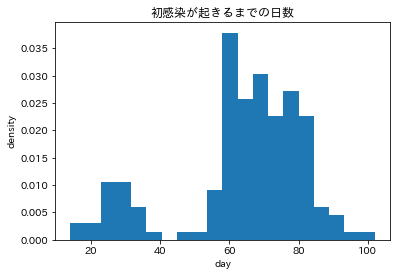

In [19]:
plt.hist(y, bins=20, density=True)
plt.xlabel("day")
plt.ylabel("density")
plt.title("初感染が起きるまでの日数")

## 初期値の設定

In [20]:
# データをランダムに2分割
random_x1 =y[y<40].values
random_x2 = y[y>40].values

In [21]:
mu1_first = np.mean(random_x1)
sigma1_first = np.sum((random_x1 - np.mean(random_x1))**2)/random_x1.shape[0]
#sigma1_first = np.var(random_x1)
print("mu1の初期値", mu1_first)
print("sigma1の初期値", sigma1_first)

mu2_first = np.mean(random_x2)
sigma2_first = np.sum((random_x2 - np.mean(random_x2))**2)/random_x2.shape[0]
#sigma2_first = np.var(random_x2)
print("mu2の初期値", mu2_first)
print("sigma2の初期値", sigma2_first)

mu1の初期値 27.304347826086957
sigma1の初期値 27.16824196597353
mu2の初期値 70.32283464566929
sigma2の初期値 100.76979353958708


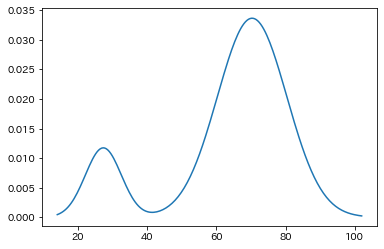

In [22]:
# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[len(random_x1)/len(y), len(random_x2)/len(y)]
#lambda_vec=[0.5, 0.5]

# 平均(mu)の初期値
mu_vec=[mu1_first, mu2_first]
# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

# データ(-6から6までを200こ)
x = sp.linspace(np.min(y), np.max(y), 200)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label="ini")

i: 0 lambda [0.153 0.847] mu [27.291  70.3073] sigma2 [ 27.1707 101.3043]
i: 5 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]
i: 10 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]
i: 15 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]
i: 20 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]
i: 25 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]
i: 30 lambda [0.153 0.847] mu [27.2902 70.3065] sigma2 [ 27.1662 101.3303]


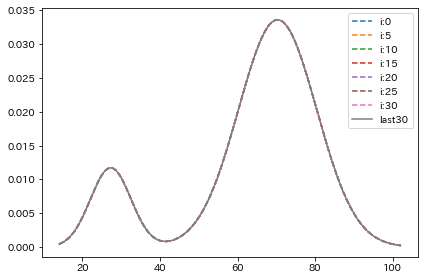

In [23]:
# 30回繰り返す
for i in sp.arange(30+1):
    # Estep
    # responsibilityの更新 
    responsibility = EStep(k_size, y, lambda_vec, mu_vec, sigma2_vec)
    
    # Mstep
    # 混合割合, 平均, 分散の更新
    lambda_vec, mu_vec, sigma2_vec = MStep(k_size, responsibility, y)
    
    if i % 5 == 0:
        print("i:", i, "lambda", lambda_vec.round(4), "mu", mu_vec.round(4), "sigma2", sigma2_vec.round(4))
        plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"i:{i}", linestyle="--")
        
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")

plt.legend()
plt.tight_layout()
plt.show()

## 推定結果

In [24]:
print("f1の混合比率", lambda_vec[0])
print("mu1", mu_vec[0])
print("sigma1", sigma2_vec[0])

f1の混合比率 0.1529612078638963
mu1 27.29017279368181
sigma1 27.16624591400156


In [25]:
print("f2の混合比率", lambda_vec[1])
print("mu2", mu_vec[1])
print("sigma2", sigma2_vec[1])

f2の混合比率 0.8470387921361038
mu2 70.3064953178221
sigma2 101.3302911639446


Text(0.5, 1.0, '初感染が起きるまでの日数')

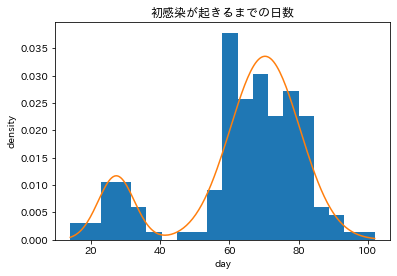

In [26]:
# 推定された分布の可視化
plt.hist(y, bins=20, density=True)
plt.plot(x, calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec), label=f"last{i}", linestyle="-")
plt.xlabel("day")
plt.ylabel("density")
plt.title("初感染が起きるまでの日数")